# Наложение шума

In [46]:
import numpy as np
import cv2

Было принято реализовать функцию генерации цветного и серого Гауссовского шума.

Сам шум генерируется по формуле плотности вероятности Гауссовского шума:

$$f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$$

где 
- $x$ - случайная величина (интенсивность пикселя в нашем случае),
- $\mu$ - математическое ожидание распределения (центр шума),
- $\sigma$ - среднеквадратическое отклонение (величина шума)

In [47]:
def gaussian_noise(image: np.ndarray, mean: float = 0, sigma: float = 1, grayscale: bool = False) -> np.ndarray:
    if grayscale:
        noise = np.random.normal(mean, sigma, (image.shape[0], image.shape[1])).astype(np.int16)
        noise = np.stack([noise] * 3, axis=-1)
    else:
        noise = np.random.normal(mean, sigma, image.shape).astype(np.int16)

    noisy_image = image.astype(np.int16) + noise

    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

Изображение случайным образом подвергается воздействию шума (с вероятностью 50%).

Принятое мат.ожидание - 0, принятое среднеквадратическое отклонение - 100.

In [48]:
import re

def generate_dataset(original_images_path: str, new_images_path: str, ratio: float = 0.5) -> None: 
    noisy_images_path = Path(new_images_path).absolute()
    images_path = Path(original_images_path).absolute()
    for i in images_path.iterdir():
        image_path = str(i.absolute())
        image_id = re.search(r'images\\(.*)', image_path).group(1)
        image = cv2.imread(image_path, 1)
        should_noisify = np.random.random() < ratio
        try:
            if should_noisify:
                noisy_image = gaussian_noise(image, 0, 50, True)
                cv2.imwrite(str(Path.joinpath(noisy_images_path, image_id)), noisy_image)
            else:
                cv2.imwrite(str(Path.joinpath(noisy_images_path, image_id)), image)
        except Exception as e:
            print('Exception occurred', e)
            continue

Смотрим на полученные результаты:

In [49]:
from pathlib import Path

images_path = '../images/'
images_path = Path(images_path).absolute()

noisy_images_path = '../preprocessed_data/'
noisy_images_path = Path(noisy_images_path).absolute()
Path.mkdir(noisy_images_path, exist_ok=True)

generate_dataset(images_path, noisy_images_path, 0.5)

In [50]:
original_len = len(list(images_path.iterdir()))
new_len = len(list(noisy_images_path.iterdir()))

print('Изначальная длина датасета:', original_len)
print('Конечная длина датасета:', new_len)
print('Не удалось конвертировать фотографий:', original_len - new_len)

Изначальная длина датасета: 1783
Конечная длина датасета: 1783
Не удалось конвертировать фотографий: 0


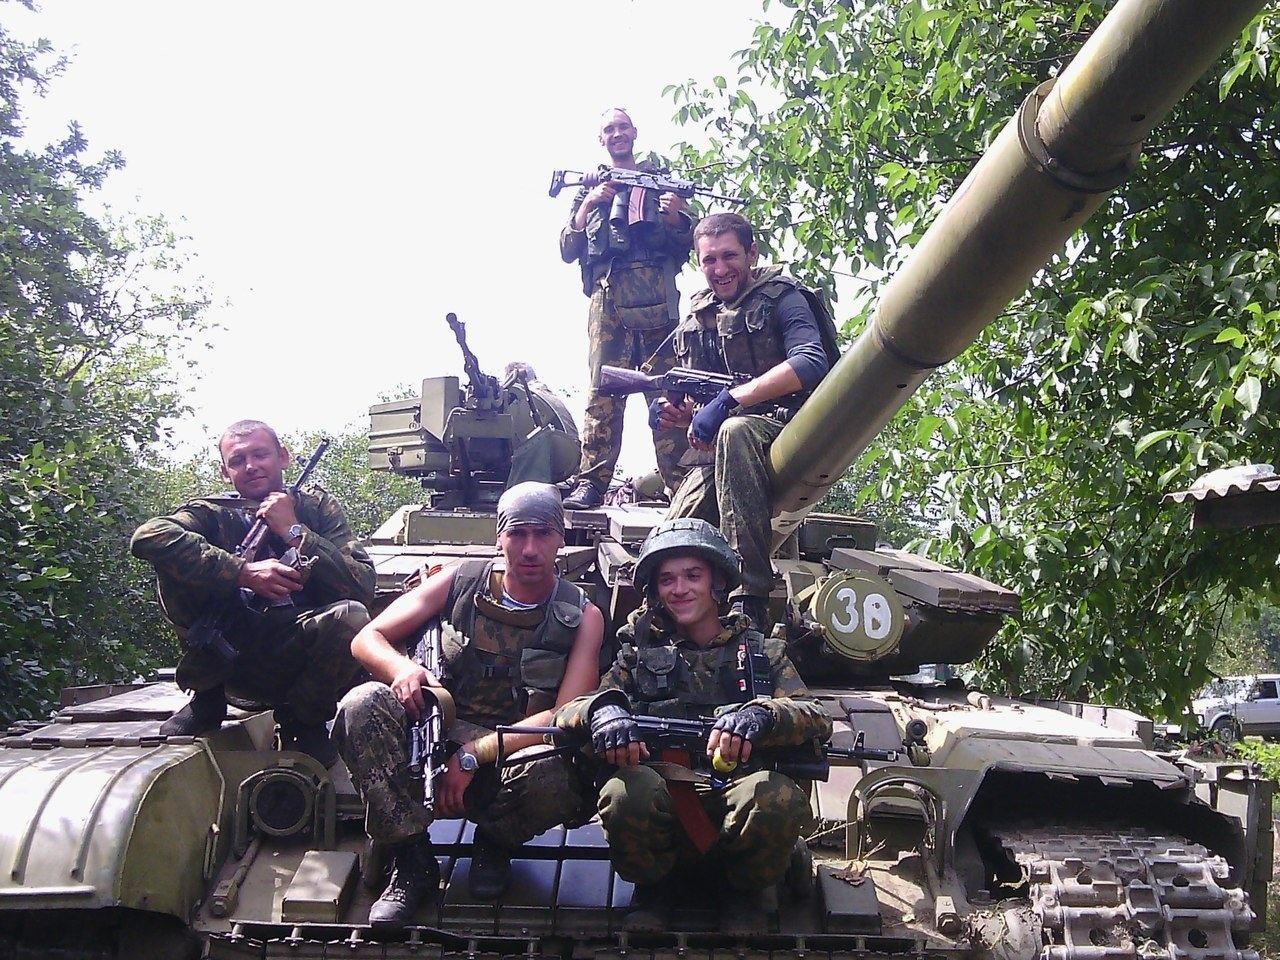

In [51]:
from PIL import Image
from IPython.display import display

random_image_path = np.random.choice(list(noisy_images_path.iterdir()))
random_image = cv2.imread(random_image_path, 1)
random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(random_image))